# **Dummy Data Seleksi Calon Pendonor Darah**
Tim kami sedang membangun sistem machine learning untuk seleksi pendonor darah berdasarkan 15 pertanyaan medis yang ditentukan sesuai dengan Permenkes Nomor 91 Tahun 2015 tentang donor darah. Setiap pertanyaan memiliki tiga kemungkinan jawaban: "Ya", "Tidak", dan "Mungkin", yang direpresentasikan secara numerik sebagai 1, 0, dan 2.

Aturan seleksi yang diterapkan adalah: jika terdapat minimal satu jawaban "Ya", maka pendonor ditolak secara permanen; jika tidak ada jawaban "Ya" tetapi terdapat minimal satu jawaban "Mungkin", maka pendonor ditolak sementara; dan jika semua jawaban adalah "Tidak", maka pendonor dinyatakan lolos. Untuk melatih model secara adil, kami menggunakan semua kemungkinan kombinasi jawaban (sebanyak 3^15) dan secara khusus memperbanyak baris dengan jawaban semua "Tidak" sebanyak 3^15 - 1 kali, guna menjaga keseimbangan label dan meningkatkan representasi kelas "Lolos".

Data dummy ini dibuat sebagai simulasi untuk membandingkan pendekatan berbasis aturan (hard code dengan if-else) dengan pendekatan machine learning dalam sistem seleksi pendonor darah. Pendekatan ini memungkinkan model machine learning belajar secara menyeluruh dari semua skenario yang mungkin terjadi, dan membantu mengidentifikasi pendonor yang benar-benar layak tanpa mengandalkan intuisi atau keputusan manual semata. Sistem ini diharapkan menjadi solusi yang efisien untuk proses kuesioner yang selama ini rawan kesalahan manusia, sekaligus mempercepat proses seleksi pendonor yang sesuai secara medis.**teks tebal**


**Import Libraries**

In [ ]:
import pandas as pd
import itertools
import numpy as np

**Definisi parameter yang dibutuhkan**

In [ ]:
YA = 1
TIDAK = 0
MUNGKIN = 2

In [ ]:
feature_names = [
    'atas_umur_65', 'kanker_darah', 'kanker_selain_darah', 'pengobatan_atau_cangkok',
    'pengobatan_diabetes', 'salahgunakan_narkoba', 'penyakit_jantung_darah',
    'terinfeksi_virus', 'penyakit_menular', 'xenotransplantasi', 'anafilaksis',
    'penyakit_autoimun', 'perdarahan_abnormal', 'penyakit_hati', 'polycythaemia_vera'
]

**Menghasilkan dataset dengan berbagai kombinasi**

In [ ]:
dataset_rows = []

In [ ]:
for combination in itertools.product([TIDAK, YA, MUNGKIN], repeat=15):
    dataset_rows.append(list(combination))

In [ ]:
df = pd.DataFrame(dataset_rows, columns=feature_names)

**Menambahkan Status Calon Pendonor Sebagai Taerget Klasifikasi**

In [ ]:
# Tambahkan kolom 'Status_Pendonor' berdasarkan aturan yang Anda berikan:
# 1. Jika ada 1 jawaban 'Ya' (nilai 1) dari 15 pertanyaan, ditolak permanen.
# 2. Jika ada 0 jawaban 'Ya', namun ada minimal 1 jawaban 'Mungkin' (nilai 2), ditolak sementara.
# 3. Pendonor lolos apabila 15 pertanyaan dijawab dengan 'Tidak' (nilai 0).
def get_donor_status(row):
    if YA in row.values:
        return "Ditolak Permanen"
    elif MUNGKIN in row.values:
        return "Ditolak Sementara"
    else: # Semua nilai harus 0 (TIDAK)
        return "Lolos"

In [ ]:
df['Status_Pendonor'] = df.apply(get_donor_status, axis=1)

In [ ]:
print(df.head())

   atas_umur_65  kanker_darah  kanker_selain_darah  pengobatan_atau_cangkok  \
0             0             0                    0                        0   
1             0             0                    0                        0   
2             0             0                    0                        0   
3             0             0                    0                        0   
4             0             0                    0                        0   

   pengobatan_diabetes  salahgunakan_narkoba  penyakit_jantung_darah  \
0                    0                     0                       0   
1                    0                     0                       0   
2                    0                     0                       0   
3                    0                     0                       0   
4                    0                     0                       0   

   terinfeksi_virus  penyakit_menular  xenotransplantasi  anafilaksis  \
0                 0

In [ ]:
df.to_csv('dataset_seleksi_pendonor_tanpa_sampling_kategori_lolos.csv', index=False)

**Duplikasi kategori "lolos" untuk keseimbangan kelas**

In [ ]:
row_lolos = df[(df[feature_names] == 0).all(axis=1)]
num_duplicates = 3**15 - 1
df_lolos_duplicated = pd.concat([row_lolos] * num_duplicates, ignore_index=True)
df_final = pd.concat([df, df_lolos_duplicated], ignore_index=True)

In [ ]:
print(f"Bentuk akhir dataset: {df_final.shape}")
print("\nDistribusi Status Pendonor setelah duplikasi:")
print(df_final['Status_Pendonor'].value_counts())

# Load Dataset
url: https://drive.google.com/file/d/1YK1HItoLafFbZMHYXXCz8vIdGkkDW-HP/view?usp=sharing

In [ ]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Split
from sklearn.model_selection import train_test_split

# Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Save model
import joblib

In [ ]:
# Load Dataset
file_id = '1YK1HItoLafFbZMHYXXCz8vIdGkkDW-HP'
url = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(url, sep=';')

In [ ]:
# Get to know data
check = data.head()
columns = data.columns
datatypes = data.dtypes

check, columns, datatypes

(   atas_umur_65  kanker_darah  kanker_selain_darah  pengobatan_atau_cangkok  \
 0             0             0                    0                        0   
 1             0             0                    0                        0   
 2             0             0                    0                        0   
 3             0             0                    0                        0   
 4             0             0                    0                        0   
 
    pengobatan_diabetes  salahgunakan_narkoba  penyakit_jantung_darah  \
 0                    0                     0                       0   
 1                    0                     0                       0   
 2                    0                     0                       0   
 3                    0                     0                       0   
 4                    0                     0                       0   
 
    terinfeksi_virus  penyakit_menular  xenotransplantasi  anafilaksis  \
 0  

# Prepocessing


In [ ]:
# Memeriksa missing values
missing_values = data.isnull().sum()
print("\nTotal missing values:")
print(missing_values)

# Mengetahui berapa persen missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPrecentage of missing values:")
print(missing_percentage)


Total missing values:
atas_umur_65               0
kanker_darah               0
kanker_selain_darah        0
pengobatan_atau_cangkok    0
pengobatan_diabetes        0
salahgunakan_narkoba       0
penyakit_jantung_darah     0
terinfeksi_virus           0
penyakit_menular           0
xenotransplantasi          0
anafilaksis                0
penyakit_autoimun          0
perdarahan_abnormal        0
penyakit_hati              0
polycythaemia_vera         0
Status_Pendonor            0
dtype: int64

Precentage of missing values:
atas_umur_65               0.0
kanker_darah               0.0
kanker_selain_darah        0.0
pengobatan_atau_cangkok    0.0
pengobatan_diabetes        0.0
salahgunakan_narkoba       0.0
penyakit_jantung_darah     0.0
terinfeksi_virus           0.0
penyakit_menular           0.0
xenotransplantasi          0.0
anafilaksis                0.0
penyakit_autoimun          0.0
perdarahan_abnormal        0.0
penyakit_hati              0.0
polycythaemia_vera         0.0
Stat

In [ ]:
# mengecek duplikat data
duplicate = data.duplicated().sum()
print(f"Total duplicate: {duplicate}")

Total duplicate: 0


In [ ]:
# Rename kolom Status_Pendonor menjadi Target
data.rename(columns={'Status_Pendonor': 'Target'}, inplace=True)

In [ ]:
print(data.columns)

Index(['atas_umur_65', 'kanker_darah', 'kanker_selain_darah',
       'pengobatan_atau_cangkok', 'pengobatan_diabetes',
       'salahgunakan_narkoba', 'penyakit_jantung_darah', 'terinfeksi_virus',
       'penyakit_menular', 'xenotransplantasi', 'anafilaksis',
       'penyakit_autoimun', 'perdarahan_abnormal', 'penyakit_hati',
       'polycythaemia_vera', 'Target'],
      dtype='object')


In [ ]:
# Mapping nilai string ke angka
label_mapping = {
    'Lolos': 1,
    'Ditolak Permanen': 2,
    'Ditolak Sementara': 3
}

# Terapkan ke kolom target
data['Target'] = data['Target'].replace(label_mapping)

<ipython-input-6-75494fc07f80>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Target'] = data['Target'].replace(label_mapping)


In [ ]:
data.head()

,atas_umur_65,kanker_darah,kanker_selain_darah,pengobatan_atau_cangkok,pengobatan_diabetes,salahgunakan_narkoba,penyakit_jantung_darah,terinfeksi_virus,penyakit_menular,xenotransplantasi,anafilaksis,penyakit_autoimun,perdarahan_abnormal,penyakit_hati,polycythaemia_vera,Target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2


# Develop Model

In [ ]:
# Memisahkan fitur dan target
X = data.drop(columns=['Target'])
y = data['Target']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# DecisionTree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# SVM
#model_svm = SVC(random_state=42)
#model_svm.fit(X_train, y_train)

In [ ]:
# KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# NB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Melihat akurasi pada tiap algoritma
dt = model_dt.predict(X_test)
rf = model_rf.predict(X_test)
#svm = model_svm.predict(X_test)
knn = model_knn.predict(X_test)
nb = model_nb.predict(X_test)

# Fungsi evaluasi
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }

# Evaluasi semua model
results = {
    'Decision Tree': evaluate_model(y_test, dt),
    'Random Forest': evaluate_model(y_test, rf),
    #'SVM': evaluate_model(y_test, pred_svm),
    'KNN': evaluate_model(y_test, knn),
    'Naive Bayes': evaluate_model(y_test, nb)
}

eval_df = pd.DataFrame(results).T
print(eval_df)

               Accuracy  Precision    Recall  F1-Score
Decision Tree  0.992738   0.993671  0.992738  0.993191
Random Forest  0.996033   0.992081  0.996033  0.994053
KNN            0.996033   0.992081  0.996033  0.994053
Naive Bayes    0.497623   0.996064  0.497623  0.660200


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

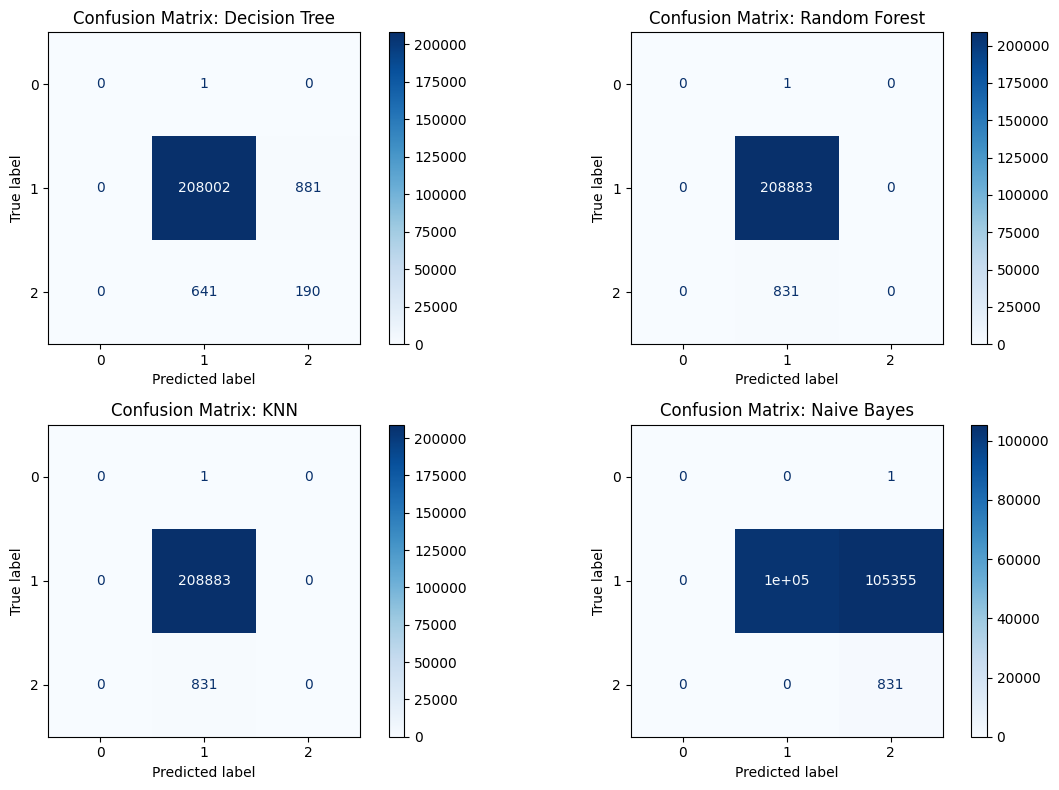

In [ ]:
# Membuat confusion matrix untuk tiap model
y_preds = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'KNN': knn,
    'Naive Bayes': nb
}

plt.figure(figsize=(12, 8))

for i, (name, y_pred) in enumerate(y_preds.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    plt.subplot(2, 2, i)
    disp.plot(ax=plt.gca(), cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')

plt.tight_layout()
plt.show()

In [ ]:
# Menyimpan model
joblib.dump(model_dt, 'DecissionTree_classification.h5')
joblib.dump(model_rf, 'RandomForest_classification.h5')
#joblib.dump(model_svm, 'SVM_classification.h5')
joblib.dump(model_knn, 'KNN_classification.h5')
joblib.dump(model_nb, 'NaiveBayes_classification.h5')

['NaiveBayes_classification.h5']